### Cargar datos

In [1]:
#Importar las librerias
import pandas as pd 
import numpy as np 
from math import factorial
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Cargar el data set
df = pd.read_csv('/datasets/games.csv')

### Prepapar los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Cambiar columnas por nombres en minuscula
df.columns = df.columns.str.lower()

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
df.isna().sum()/df.shape[0]

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

#### Valores ausentes
He decidido eliminar los valores ausentes en las columas de name y genre ya que en las columnas name y genre solo hacian faltan 2 datos por lo que no va interferir si los elimino. 

Con respecto a la columna de year_of_release he decido llenar algunos datos con la mediana de los juegos que fueron sacados en diferentes plataformas y en los mismo anos, los datos que no pude rellenar con este metodo decidi eliminarlos ya que no me es requerido trabajar con todo el dataset completo y es mejor eso que trabajar con valores inventados. 

Con respecto a las demas columnas critic_score, user_score, rating, he decido dejarlos como estan ya que son muchos datos ausentes y cualquier cosa que se haga con ellos puede perjudicar mucho todo el analisis en general y ya que no tenemos otra forma de obtener la informacion que falta. 

En la columna de user_score donde tenemos los tbd, he decidido convertilos en NAN para que no me interfieran en mi analisis y tambien poder pasar los otros valores como numeros flotantes en lugar de objetos.

A mi parecer los valores estan ausentes debido a que puede que alguno de los clientes dejo cosas sin responder o tambien pudo ser que no se logro recopilar toda la informacion con respecto a todos los juegos ya que no hubieron suficientes criticas o simplemente pudo ser que se perdio informacion cuando se hicieron los datasets.



In [7]:
#Tratar los valores ausentes
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [8]:
df = df.dropna(subset=['name','genre','year_of_release'],axis=0)

#### Convertir tipos de datos
Cambie lo datos de la columna year of release a numeros enteros ya que en el dataset se puede ver que realmente no tienen decimales y tampoco es necesarios que los tenga. Ademas cambie el tipo de datos de la columna category para asi poder tener solo el numero de ID de las categorias.


In [9]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [10]:
df['platform'] = df['platform'].astype('category')

In [11]:
df['rating'] = df['rating'].astype('category')

#### Ventas totales

In [32]:
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


### Analisis de datos

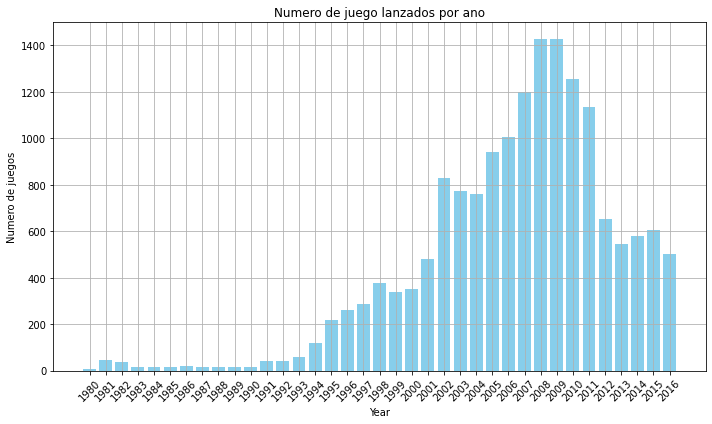

In [13]:
#Juegos lanzados en diferentes anos 
release_years = df['year_of_release']


juegos_por_anos = release_years.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(juegos_por_anos.index, juegos_por_anos.values, color='skyblue')

plt.title('Numero de juego lanzados por ano')
plt.xlabel('Year')
plt.ylabel('Numero de juegos')

plt.xticks(juegos_por_anos.index, rotation=45) #axis rotativo para mejor visibilidad 
plt.grid(True) 


plt.tight_layout() #ajuste del layout
plt.show()


Pregunta 1: Conclusion:  Con este grafico podemos ver cuantos juegos fueron lanzados en diferentes anos y notamos que entre 1980 y el 2000 muy pocos juegos fueron creados, esto debido a la poca tecnologia que habia en ese entonces, a partir del 2001 empezamos a ver un incremento en la creacion de juegos siendo entre 2009 y 2010 los anos con mayor auge en la creacion de nuevos o mejorados juegos y despues podemos ver una baja a partir del 2012 y hasta el 2016, esto puede ser porque no tenemos los datos completos o porque definitivamente paso algo en ese periodo por lo que tuvieron que dejar de sacar tantos juegos. No pueden ser significativos los datos de cada periodo ya que en los primeros anos muy pocos juego fueron creados. 

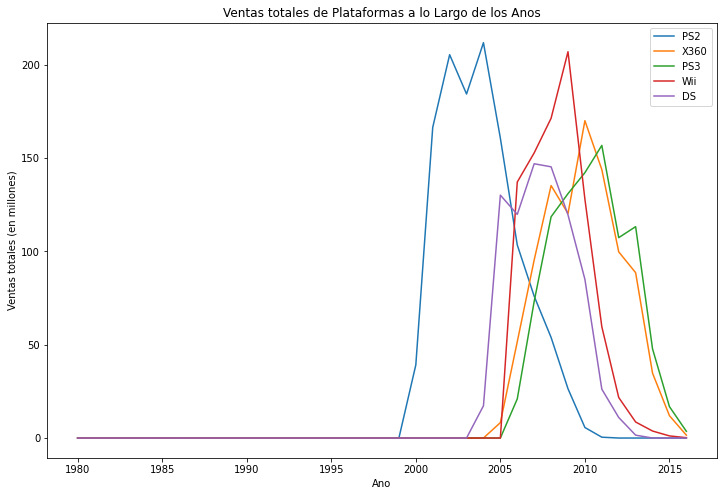

In [14]:
#Variacion de ventas de plataforma a otra 
ventas_de_plataformas = df.groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack()
top_platforms = ventas_de_plataformas.sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 8))
for platform in top_platforms:
    plt.plot(ventas_de_plataformas.index, ventas_de_plataformas[platform], label=platform)
    
plt.title('Ventas totales de Plataformas a lo Largo de los Anos')
plt.xlabel('Ano')
plt.ylabel('Ventas totales (en millones)')
plt.legend()
plt.show()

Pregunta 2: Conclusion: Con este grafico podemos ver que las diferentes plataformas empezaron a tener auge a partir del 2000, en donde vemos que el PS2 y el Wii fueron los que mas ventas tuvieron entre el 2000 y el 2010, mientras que las demas presentan un crecimiento en las ventas a partir del 2005 pero no tuvieron tanto exito como lo fueron las primeras dos. Y tambien podemos ver que estas mismas plataformas de PS2 y Wii bajaron sus ventas despues del 2005 cuando empezaron aparecer las nuevas como el X360 o incluso el nuevo PS3. Vemos que masomenos tardaron 5 anos en ir desapareciendo. 


Pregunta 3: Conclusion: Elegi un periodo de 5 anos atras para ver los datos, ya que no me sirve basarme en plataformas que ya no existen o que ya no tienen las mismas ventas y mejor concentrarse en las mas modernas que si van a representar competensias con respecto a las otras. 

In [15]:
#Filtrar la data para los anos mas relevantes 
datos_relevantes = df[df['year_of_release'] >= 2011]


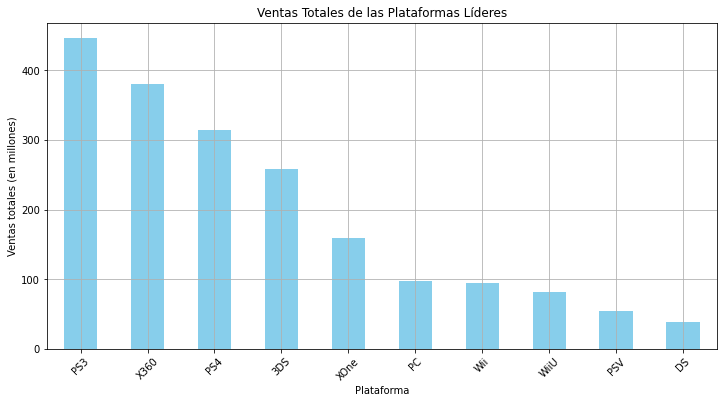

In [16]:
#Platarformas lideres en ventas

platform_sales = datos_relevantes.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

# 5 primeras
top_platforms = platform_sales.head(10)

# 5 ultimas
last_platforms= platform_sales.tail(10)

plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales de las Plataformas Líderes')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Pregunta 4: Conclusion: En este grafico podemos notar cuales son las 5 plataformas con mas ventas y las 5 con menos venta a lo largo de los ultimos 5 anos,tenemos el PS3 en primer lugar y esto nos dice mucho ya que fue en esa epoca que se empezo a ver mas el avance de la tecnologia en las consolar, vemos que el X360 siempre fue la competencia aun asi podemos observar que no tuvo la misma cantidad de ventas que el PS3 pero estuvo muy cerca.  

<Figure size 864x576 with 0 Axes>

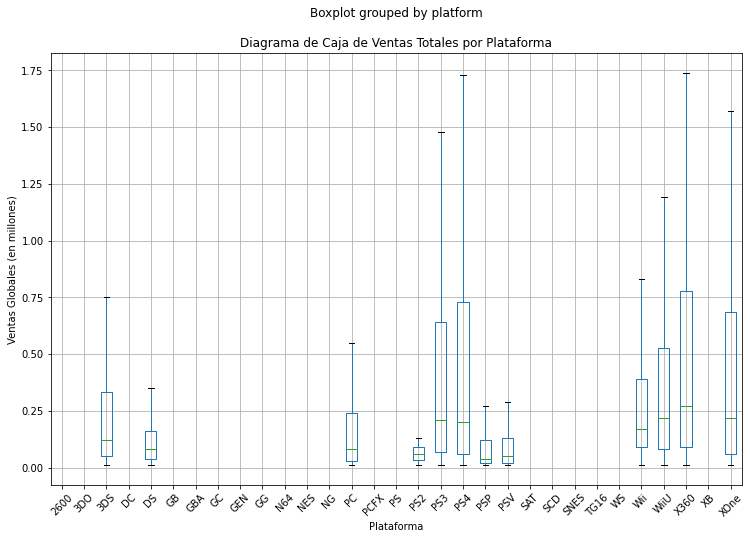

In [17]:
#Diagrama de caja para ventas globales 

plt.figure(figsize=(12, 8))
datos_relevantes.boxplot(column='sales_total', by='platform', figsize=(12, 8), rot=45, showfliers=False)
plt.title('Diagrama de Caja de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

Pregunta 5: Conclusion: En este grafico podemos ver que las medianas de la mayoria de los juego se encuentran en un nivel parecido, a excepcion de algunos que demuestra que han sido juegos mas exitosos, asimismo podemos ver que las plataformas que mas exito han tenido en los ultimos 5 anos son el PS3 y 4 como tambien el X360, mientras que las que han tenido mucha baja en sus ventas son las plataformas que ya van quedando obsoletas como el DS y el Wii. 

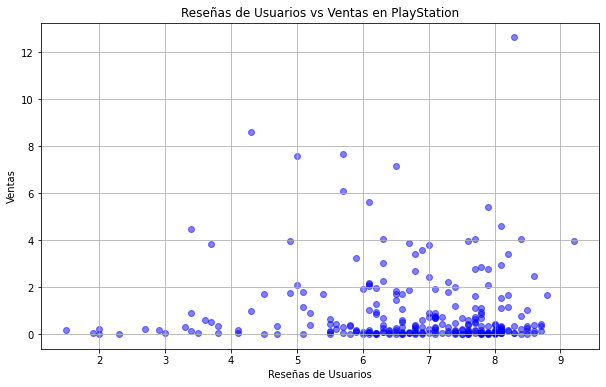

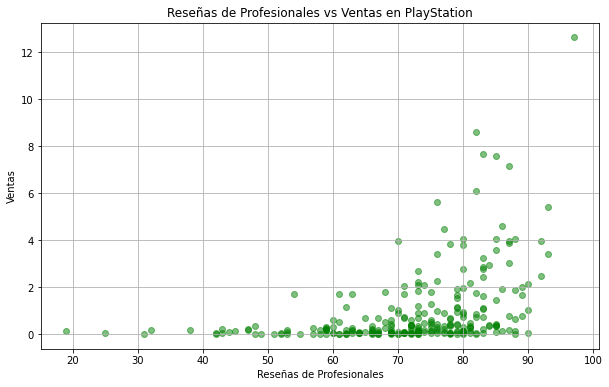

In [18]:
# Grafico de dispersion que representa la correlacion entre las resenas y las ventas

playstation_data = datos_relevantes[datos_relevantes['platform'] == 'PS4']

# Grafico de dispersión para resenas de usuarios vs ventas en PlayStation
plt.figure(figsize=(10, 6))
plt.scatter(playstation_data['user_score'], playstation_data['sales_total'], color='blue', alpha=0.5)
plt.title('Reseñas de Usuarios vs Ventas en PlayStation')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

#Gráfico de dispersión para resenas de profesionales vs ventas en PlayStation
plt.figure(figsize=(10, 6))
plt.scatter(playstation_data['critic_score'], playstation_data['sales_total'], color='green', alpha=0.5)
plt.title('Reseñas de Profesionales vs Ventas en PlayStation')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


Pregunta 6: Conclusion: En este grafico podemos ver la correlacion entre los usuarios y los criticos en donde vemos que las resenas de los usuarios fueron negativas y sugiere que hay una relacion muy debil en esas resenas de los usuarios y que por lo tanto no tienen un impacto en las ventas de las consolas mientras que en lo que respecta a las criticas esto si tuvo un poco mas de impacto en las personas cuando estaban deciciendo que consola comprar y por lo tanto demuestra que hubo mas ventas con respecto a las criticas de los profesionales. 

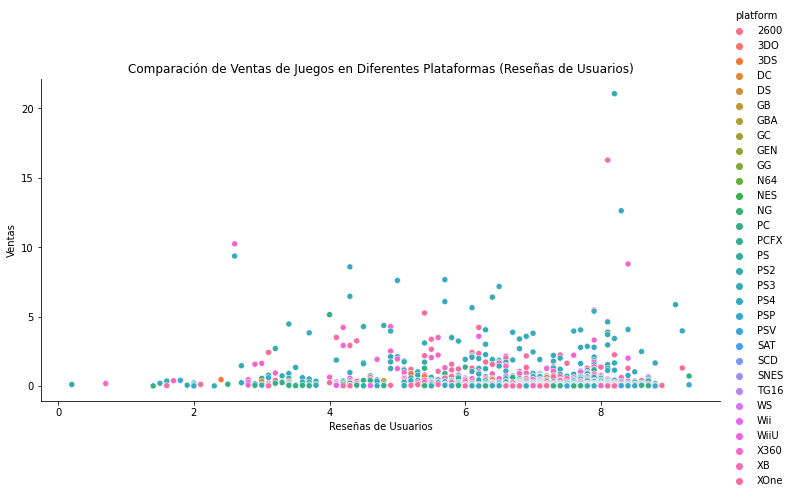

In [19]:
#Comparar las ventas de los mismos juegos en otras plataformas.

common_games = datos_relevantes[datos_relevantes['name'].isin(playstation_data['name'])]

sns.relplot(x='user_score', y='sales_total', hue='platform', data=common_games, aspect=2)
plt.title('Comparación de Ventas de Juegos en Diferentes Plataformas (Reseñas de Usuarios)')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas')
plt.show()



Pregunta 7:Conclusion: Con este grafico podemos observar que las resenas de los usuarios realmente no son relevantes en ningun plataforma o en algun juego en especifico ya que podemos ver como todos los puntos se encuentran muy cerca de los otros, siempre vamos a tener excepciones como por ejemplo con el PS2 o el Wii en los que se nota que si tuvieron un poco mas de importancia las resenas y por eso sus ventas fueron mayores. 

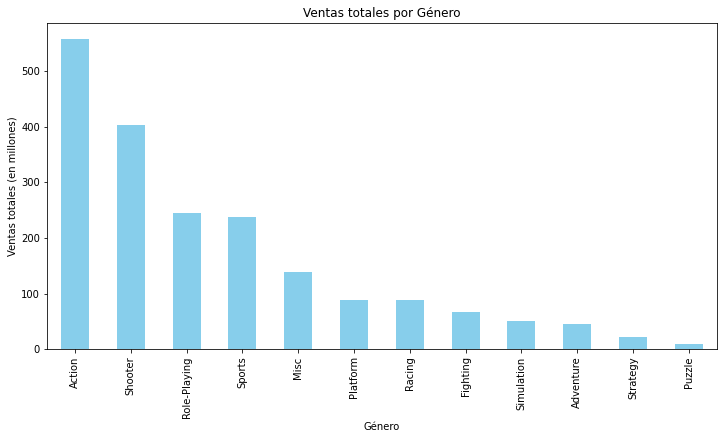

Géneros más rentables:
genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Name: sales_total, dtype: float64

Géneros con ventas más bajas:
genre
Fighting      66.90
Simulation    50.26
Adventure     45.04
Strategy      22.16
Puzzle         9.85
Name: sales_total, dtype: float64


In [20]:
# Distribucion por genero 

genre_sales = datos_relevantes.groupby('genre')['sales_total'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')


plt.title('Ventas totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones)')

plt.show()


print("Géneros más rentables:")
print(genre_sales.head())


print("\nGéneros con ventas más bajas:")
print(genre_sales.tail())


Pregunta 8: Conclusion: Con este grafico podemos ver como los generos con mayores ventas suelen ser los de accion y tiroteo que suelen ser lo mas entretenidos para los usuarios mientras que los juegos de aventura, estrategia y rompecabezas tienen ventas mucho mas bajas en los ultimos 5 anos por lo que no son tan rentables para las empresas.

### Perfiles para cada region

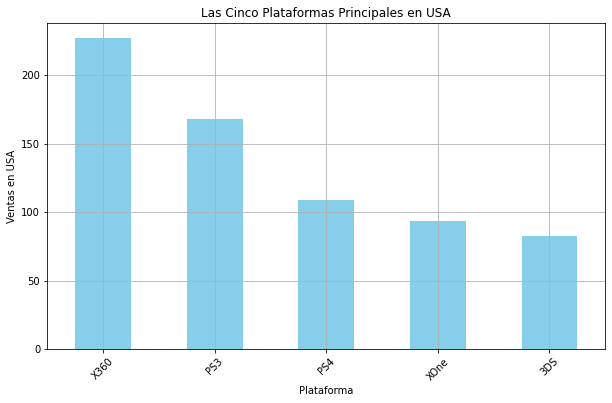

Las cinco plataformas principales en USA:
platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64


In [21]:
# Calcular las ventas totales por plataforma en USA
ventas_por_plataforma_na = datos_relevantes.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

top_5_plataformas_na = ventas_por_plataforma_na.head(5)

plt.figure(figsize=(10, 6))
top_5_plataformas_na.plot(kind='bar', color='skyblue')
plt.title('Las Cinco Plataformas Principales en USA')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en USA')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


print("Las cinco plataformas principales en USA:")
print(top_5_plataformas_na)


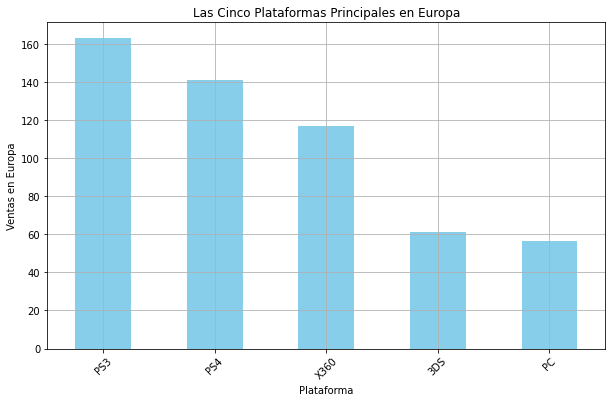

Las cinco plataformas principales en Europa:
platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

Las cinco plataformas principales en USA:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64


In [22]:
# Calcular las ventas totales por plataforma en Europa
ventas_por_plataforma_ue = datos_relevantes.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

top_5_plataformas_ue = ventas_por_plataforma_ue.head(5)

plt.figure(figsize=(10, 6))
top_5_plataformas_ue.plot(kind='bar', color='skyblue')
plt.title('Las Cinco Plataformas Principales en Europa')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Europa')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Las cinco plataformas principales en Europa:")
print(top_5_plataformas_ue)

#Ventas totales en NA
ventas_por_plataforma_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

top_5_plataformas_na = ventas_por_plataforma_na.head(5)


print("\nLas cinco plataformas principales en USA:")
print(top_5_plataformas_na)


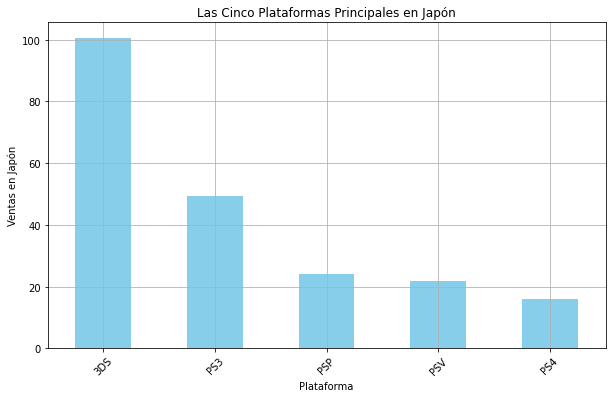

Las cinco plataformas principales en Japón:
platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64


In [23]:
# Calcular las ventas totales por plataforma en Japón
ventas_por_plataforma_jp = datos_relevantes.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

top_5_plataformas_jp = ventas_por_plataforma_jp.head(5)

plt.figure(figsize=(10, 6))
top_5_plataformas_jp.plot(kind='bar', color='skyblue')
plt.title('Las Cinco Plataformas Principales en Japón')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en Japón')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Las cinco plataformas principales en Japón:")
print(top_5_plataformas_jp)

top_5_plataformas_na = ventas_por_plataforma_na.head(5)


Conclusion: Con estos 3 graficos podemos ver como varian las plataformas principales entre las 3 regiones, se nota que si existe una diferencia grande y esto se debe a la diferencia cultural en estas regiones, en donde podemos observar que la region de USA la plataforma mas utilizada fue el X360 seguido de las consolas de playstation que definitivamente fueron un exito a nivel mundial, como lo es en Europa donde observamos que en los ultimos 5 anos las plataformas mas utilizados fueron el PS3 y 4 teniendo estos dos ventas muy cercanas mientras en que en Japon si vemos una distincion un poco mas grande ya que la consola con mayores ventas en los ultimos anos fue el 3DS seguido el PS3 con ventas bastante bajas en comparacion con el primero, lo que nos dice que la poblacion en Japon si es mas distinta que en el resto del mundo. 

In [24]:
#Generos principales en USA

ventas_na = datos_relevantes[['genre', 'na_sales']]
ventas_totales_por_genero_na = ventas_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_5_generos_na = ventas_totales_por_genero_na.head(5)

print("Los cinco géneros principales en América del Norte:")
print(top_5_generos_na)

Los cinco géneros principales en América del Norte:
genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64


In [25]:
#Generos principales en Europa
ventas_eu = datos_relevantes[['genre', 'eu_sales']]
ventas_totales_por_genero_eu = ventas_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_5_generos_eu = ventas_totales_por_genero_eu.head(5)

print("Los cinco géneros principales en Europa:")
print(top_5_generos_eu)


Los cinco géneros principales en Europa:
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64


In [26]:
#Generos principales en Japon
ventas_jp = datos_relevantes[['genre', 'jp_sales']]
ventas_totales_por_genero_jp = ventas_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_5_generos_jp = ventas_totales_por_genero_jp.head(5)

print("Los cinco géneros principales en Japón:")
print(top_5_generos_jp)


Los cinco géneros principales en Japón:
genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64


Conclusion: Aca nuevamente podemos ver como en USA y en Europa si existe un parecido entre los generos de los juegos que les gustan, siendo accion, tiroteo y deportes los que mas exito tienen en estas dos regiones, aun asi podemos ver como las ventas en USA si son significativamente mayores que en Europa, mientras que en Japon notamos un diferencia  esto posiblemente sea por la cultura del cosplay que a ellos tanto les gusta ya que vemos que el genero con mas ventas es el de Role Play e igualmente vemos que el que les siguen es accion por lo que con esto podemos confirmar que este genero es el mas popular a nivel mundial.

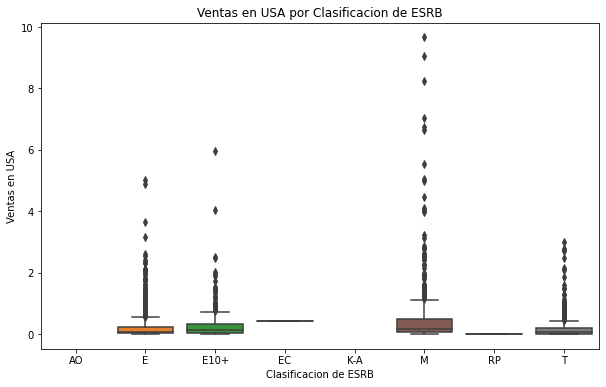

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='na_sales', data=datos_relevantes)
plt.title('Ventas en USA por Clasificacion de ESRB')
plt.xlabel('Clasificacion de ESRB')
plt.ylabel('Ventas en USA')
plt.show()


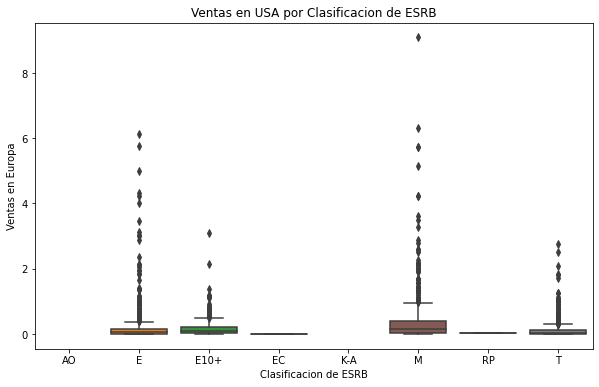

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='eu_sales', data=datos_relevantes)
plt.title('Ventas en USA por Clasificacion de ESRB')
plt.xlabel('Clasificacion de ESRB')
plt.ylabel('Ventas en Europa')
plt.show()

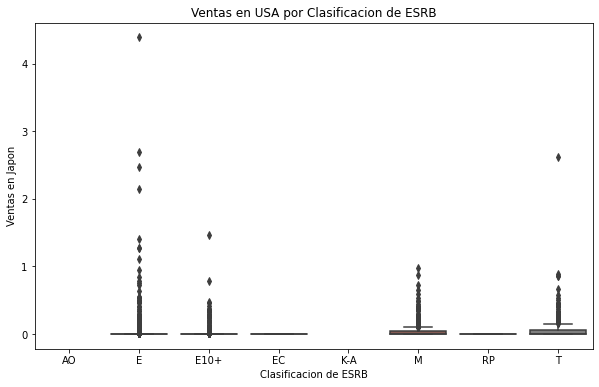

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='jp_sales', data=datos_relevantes)
plt.title('Ventas en USA por Clasificacion de ESRB')
plt.xlabel('Clasificacion de ESRB')
plt.ylabel('Ventas en Japon')
plt.show()

Conclusion: Nuevamente con estos graficos podemos ver que existen similitudes entre USA y Europa mientras que la mayor diferencia se ve marcada en los usuarios de Japon, ya que se observa como en USA y Europa la clasificacion con mayores ventas y donde claramente se puede una diferencia con las medianas de otras clasificacion en donde vemos que la categoria de "mature" es la que tiene mas ventas seguido por la categoria de "everyone" donde vemos que en Europa tuvo mayores ventas que en USA, en cambio en Japon se puede concluir que la category "everyone"es la que mas sobresale y en este caso la de "mature" no tuvo ventas significativas, asi mismo podemos ver como en Japon las medianas de todas las clasificaciones se encuentran casi en el mismo nivel por lo que vemos que las ventas fueron muy similares en todos por lo que quiere decirnos que en Japon la clasificacion por edad no tiene una gran relevancia en el momento de elegir juegos.  

### Prueba de Hipotesis


In [30]:
#Filtrado de clasificaciones
calificaciones_xbox_one = datos_relevantes[datos_relevantes['platform'] == 'XOne']['user_score'].dropna()
calificaciones_pc = datos_relevantes[datos_relevantes['platform'] == 'PC']['user_score'].dropna()


resultado = st.ttest_ind(calificaciones_xbox_one, calificaciones_pc)


print("Estadística de prueba t:", resultado.statistic)
print("Valor p:", resultado.pvalue)

# Comprobar si se rechaza la hipótesis nula
nivel_significancia = 0.05
if resultado.pvalue < nivel_significancia:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC.")
else:
    print("No se rechaza la hipótesis nula: no hay suficiente evidencia para concluir que hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC.")


Estadística de prueba t: 0.48660071309601444
Valor p: 0.6267602271422398
No se rechaza la hipótesis nula: no hay suficiente evidencia para concluir que hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC.


In [31]:
# Filtrado por generos
calificaciones_accion = datos_relevantes[datos_relevantes['genre'] == 'Action']['user_score'].dropna()
calificaciones_deportes = datos_relevantes[datos_relevantes['genre'] == 'Sports']['user_score'].dropna()

resultado = st.ttest_ind(calificaciones_accion, calificaciones_deportes)


print("Estadística de prueba t:", resultado.statistic)
print("Valor p:", resultado.pvalue)

# Comprobar si se rechaza la hipótesis nula
nivel_significancia = 0.05
if resultado.pvalue < nivel_significancia:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.")
else:
    print("No se rechaza la hipótesis nula: no hay suficiente evidencia para concluir que hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.")


Estadística de prueba t: 10.399926387716395
Valor p: 5.1974550252152054e-24
Se rechaza la hipótesis nula: hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.


En ambas hipotesis utilice el criterio de la t-test ya que no tenemos el conocimiento de las desviaciones estandar y ademas porque debemos probar que hay o no hay una diferencia significativa entre dos grupos distintos. 

Con la primera prueba de hipotesis nos damos cuenta que cuando no se rechaza la hipotesis nula quiere decir que no tenemos suficiente evidencia estadistica para probar que existen diferencias entre estas dos plataformas pero eso no nos quiere decir que no las tengan, si no mas bien que son dos consolas diferentes por lo que es posible que tengan una audiencia muy distinta lo que hace que cada uno este satisfecho con el producto en especifico, al igual que disconforme con algunas cosas de la misma plataforma, por lo que en este caso seria mejor estudiarlas por aparte si fuera necesario. 

Con la segunda prueba de hipotesis puedo concluir que a diferencia de la primera si existen diferencias significativas en las calificaciones de estos dos generos, lo que nos sugiere que es posible que los usuarios tengan diferentes experiencias en los juegos por lo que pueden tener diferentes calificaciones dependiendo de los graficos, el entretenimiento que proporcionen, etc. 

### Conclusion General
Como conclusion general se puede decir que en las tres regiones estudiadas encontramos muchas diferencias por lo que es mejor centrarse en cada una de ellas para determinar si un juego va tener exito o no, asimismo si vemos que hay similitudes entre los usuarios de USA y Europa por lo que se podrian tratar casi iguales solamente tomando en cuenta las pequenas diferencias. Ademas vemos que la vida util de las consolas o los juegos suele ser de poquito mas de 5 anos, por lo que seria algo a tomar a consideracion cuando se esten planeado estas campanas de marketing ya que asi podemos tambien tener cuidado en el momento de decidir cuando tiempo o presupuesto tome hacer un juego que va a tener exito solo por 5 anos o hasta menos. 
En lo que respecta a las calificaciones de usuarios y criticos profesionales debemos ser concientes de que ambos pueden tener distintas percepciones y satisfaccion cuando hablamos de diferentes aspectos de los juegos como lo son los generos o las plataformas. Por lo tanto si debe haber mucha importancia en lo que tiene que ver con las preferencias de los usuarios o consumidores para de esta forma poder adaptar las estrategias de marketing y ventas a cada uno de ellos siempre tomando en cuenta el paso del tiempo que claramente nos dice que pueden cambiar mucho con este. 